Howdy! Data is available for July 2023. Please enter the number of the day to begin forecasting from (1-31):  1
How many days would you like to forecast?  2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

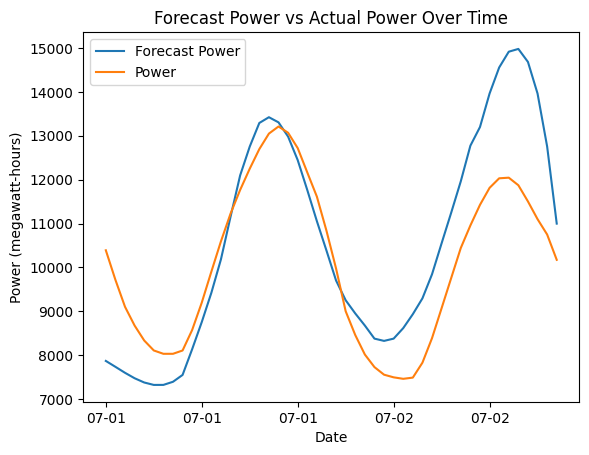

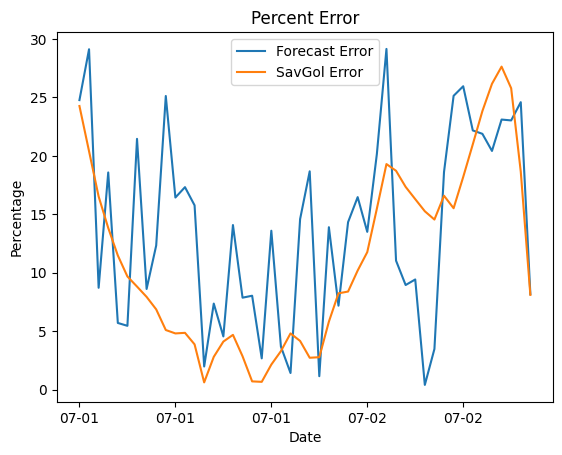

/tmp/ipykernel_100/711642717.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_hours['time'] = missing_hours['time'].dt.strftime('%H:%M')


Mean Average Percent Error - base forecast:  13.961622436036402
Mean Average Percent Error - savgol forecast:  11.201827782150586
Forecast Generation Time: 11.909458637237549 seconds
-------------------------------
Notification: Missing hour(s) detected between the following timestamps:
     date   time
0   07-01  00:00
24  07-02  00:00
   location  year   date   time  temp  precip  humidity     power  \
0     SCENT  2023  07-01  00:00    80     0.0        76  10390.24   
1     SCENT  2023  07-01  01:00    78     0.0        87   9716.65   
2     SCENT  2023  07-01  02:00    79     0.0        88   9102.73   
3     SCENT  2023  07-01  03:00    77     0.0        94   8675.06   
4     SCENT  2023  07-01  04:00    78     0.0        90   8335.00   
5     SCENT  2023  07-01  05:00    77     0.0        96   8107.70   
6     SCENT  2023  07-01  06:00    76     0.0        97   8031.59   
7     SCENT  2023  07-01  07:00    76     0.0        97   8031.71   
8     SCENT  2023  07-01  08:00    78   

Would you like to run again? (y/n) n


In [9]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import pymilvus
import time as time
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pathlib import Path
from pymilvus import (
    connections,
    utility,
    FieldSchema, CollectionSchema, DataType,
    Collection,
)

from sqlalchemy import create_engine, MetaData
from sqlalchemy.engine import URL
import pypyodbc

# connect to milvus vdb
connections.connect(
  alias="default",
  user='root',
  password='tecafs',
  host='localhost',
  port='19530'
)

# set up embedding model
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

#initialize df for access outside of while loop
filtered_df = pd.DataFrame()

#while loop allows user to run multiple times
run_again = 'y'
while(run_again == 'y' or run_again == 'yes' or run_again == 'Y' or run_again == 'Yes'):

  # Read in the CSV file
  data_folder = Path("/mnt/c/Users/wcans/milvus_compose/ERCOT_Hourly_Load_2022/")
  csv_file_path = data_folder / "july23demodata.csv"  # Path to raw 2023 data (pre forecasting)
  forecast_df = pd.read_csv(csv_file_path) #create dataframe

  ###################################

  # declares the variables and defines them for the server connections, along with the table names that are going to be assigned
  SERVER_NAME = 'tcp:tecafs.database.windows.net,1433'
  DATABASE_NAME = 'TecafsSqlDatabase'
  TABLE_NAME = 'test_weather_forecast'

  ###################################

  # makes the connection to the database with the connection string; has the driver, server name, database name, id, and password
  connection_string = f"""
      DRIVER={{ODBC Driver 18 for SQL Server}};
      SERVER={SERVER_NAME};
      DATABASE={DATABASE_NAME};
      Uid={'tecafs2023'};
      Pwd={'Capstone50'};
  """
  ###################################

  connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})
  engine = create_engine(connection_url, module=pypyodbc)  

  ###################################

  '''
  #Query the data from the clean_data table
  query = "SELECT * FROM test_weather_forecast" 

  #Execute the query and load data into a Dataframe
  forecast_df = pd.read_sql(query, engine) #create dataframe'''


  start_day = int(input('Howdy! Data is available for July 2023. Please enter the number of the day to begin forecasting from (1-31): '))
  num_days = int(input('How many days would you like to forecast? '))
  
  if((32-start_day) < num_days):
      num_days = 32-start_day
  
  #find indices to start and end at
  end_day = start_day+num_days-1
  start_hour = 24*(start_day-1)
  end_hour = (24*end_day)-1

  #filter and set as new dataframe
  filtered_df = pd.DataFrame(forecast_df.iloc[start_hour:(end_hour+1)])

  #define embedding function
  def get_embedding(prevec):
      text = [prevec]
      embedding = model.encode(text)
      return embedding

  #format the prevector data conglomeration as year/date/time/temp/precip/humidity, then get embeddings
  filtered_df['vector'] = filtered_df.apply(lambda row: get_embedding(f"{row['year']}/{row['date']}/{row['time']}/{row['time']}/{row['time']}/{row['temp']}/{row['precip']}/{row['humidity']}"), axis=1)
  filtered_df['vector'] = filtered_df['vector'].apply(lambda row: row[0])  #fix formatting of vector

  collection = Collection("small_historical_data_3")  #get existing milvus collection
  collection.load()  #load collection






    
  def search(text, time, date, top_k = 10):
      # AUTOINDEX does not require any search params, chosen to specify metric
      search_params = {
          "metric_type": "L2"
      }

      #do similarity search
      results = collection.search(
          data = [text],
          anns_field='vector',
          param=search_params,
          limit = top_k,  # Limit to top_k results per search
          ##output_fields=['original_question', 'answer']  # Include the original question and answer in the result
          output_fields=['index', 'year', 'date', 'time', 'temp', 'precip', 'humidity', 'power']
      )
      avg_power = 0
      
      #sum the top_k power values
      for hit in  results[0]:
          #print (hit.entity.get(['year', 'date', 'time', 'temp', 'precip', 'humidity', 'power']))
          avg_power += hit.entity.get('power')

      #calculate average power, adjust to tune for best results
      month = int(date.split('-')[0])
      hour = int(time.split(':')[0])
      #yearly_avg = (-1200*math.sin((math.pi/6)*(month-1)+1))+(600*math.sin((math.pi/3)*(month-1)+1))+8200
      yearly_amp = (-1000*math.sin((math.pi/6)*(month-1)+1))+(300*math.sin((math.pi/3)*(month-1)+1))+1700
      #(-700*math.sin((math.pi/6)*(month-1)+1))+(300*math.sin((math.pi/3)*(month-1)+1))+2000
      #daily_power = (-(yearly_amp)*math.sin((math.pi/12)*hour))+yearly_avg
      #avg_power= (-3000*math.sin((math.pi/12)*hour))+(avg_power/top_k)
      avg_power= (-(yearly_amp)*math.sin((math.pi/12)*hour))+(avg_power/top_k)
      return avg_power

  start_time = time.time()
  filtered_df['forecast_power'] = filtered_df.apply(lambda row: search(row['vector'], row['time'], row['date']), axis=1)  
  end_time = time.time()

  elapsed_time = end_time - start_time

  #Calculate percent error for each row
  filtered_df['percent_error'] = ((abs(filtered_df['forecast_power'] - filtered_df['power'])) / filtered_df['power']) * 100
  
  #Calculate overall percent error
  mean_percent_error = filtered_df['percent_error'].mean()


    

  #apply savitsky-golay filter for smoothing
  filtered_df['forecast_savgol'] = filtered_df[['forecast_power']].apply(lambda x: savgol_filter(x,18,3))

  #Calculate savgol percent error for each row
  filtered_df['savgol_percent_error'] = ((abs(filtered_df['forecast_savgol'] - filtered_df['power'])) / filtered_df['power']) * 100
  
  #Calculate overall savgol percent error
  savgol_mean_percent_error = filtered_df['savgol_percent_error'].mean()


    

  '''
  def combine_seasonal_cols(input_df, seasonal_model_results):
    #Adds inplace new seasonal cols to df given seasonal results
    #Args:
    #    input_df (pandas dataframe)
    #    seasonal_model_results (statsmodels DecomposeResult object)
    
    # Add results to original df
    input_df['observed'] = seasonal_model_results.observed
    input_df['residual'] = seasonal_model_results.resid
    input_df['seasonal'] = seasonal_model_results.seasonal
    input_df['trend'] = seasonal_model_results.trend
   
  #Check seasonality of data to validate
  seasonality_df = filtered_df[['year', 'date', 'time', 'power']]
  seasonality_df['year'] = seasonality_df['year'].astype(str)
  seasonality_df['time'] = pd.to_datetime(seasonality_df['date'] + '-' + seasonality_df['year'] + seasonality_df['time'], format='%m-%d-%Y%H:%M')
  seasonality_df_2 = seasonality_df[['time', 'power']]
  seasonality_df_2.set_index('time', inplace=True)
  sd = sm.tsa.seasonal_decompose(seasonality_df_2, period=12)
  sd.plot()
  combine_seasonal_cols(seasonality_df_2, sd)
  
  pred_seas_df = filtered_df[['year', 'date', 'time', 'forecast_power']]
  pred_seas_df['year'] = pred_seas_df['year'].astype(str)
  pred_seas_df['time'] = pd.to_datetime(pred_seas_df['date'] + '-' + pred_seas_df['year'] + pred_seas_df['time'], format='%m-%d-%Y%H:%M')
  pred_seas_df_2 = pred_seas_df[['time', 'forecast_power']]
  pred_seas_df_2.set_index('time', inplace=True)
  pred_sd = sm.tsa.seasonal_decompose(pred_seas_df_2, period=12)
  pred_sd.plot()
  combine_seasonal_cols(pred_seas_df_2, pred_sd)

  #create and print trend plot
  seasonality_df_2.reset_index(drop=True)
  pred_seas_df_2.reset_index(drop=True)
  seasonality_df_2.plot(x="time", y='trend', kind="line")
  pred_seas_df_2.plot(x="time", y='trend', kind="line")
  # Display the plot
  plt.title('Forecast Power Trend vs Actual Power Trend Over Time')
  plt.xlabel('Date')
  plt.ylabel('Power (megawatt-hours)')
  plt.legend(['Power Trend', 'Forecast Power Trend'])
  plt.savefig('trend_figure.png')
  plt.show(block=True)'''
  

  # Write the modified DataFrame back to a new CSV file
  output_csv_file_path = data_folder / '5daydemoforecast1_out.csv'  # Replace with the desired output path
  #not enabled at the moment
  #filtered_df.to_csv(output_csv_file_path, index=False)

  '''#print data
  #create and print plots
  filtered_df.plot(x="date", y=["forecast_power", "power", "forecast_savgol"], kind="line")
  # Display the plot
  plt.title('Forecast Power vs Actual Power Over Time')
  plt.xlabel('Date')
  plt.ylabel('Power (megawatt-hours)')
  plt.legend(['Forecast Power', 'Power', 'SavGol Forecast'])
  plt.savefig('power_figure.png')
  plt.show(block=True)'''

  #print data
  #create and print plots
  filtered_df.plot(x="date", y=["forecast_savgol", "power"], kind="line")
  # Display the plot
  plt.title('Forecast Power vs Actual Power Over Time')
  plt.xlabel('Date')
  plt.ylabel('Power (megawatt-hours)')
  plt.legend(['Forecast Power', 'Power'])
  plt.savefig('power_figure.png')
  plt.show(block=True)


  filtered_df.plot(x='date', y=['percent_error', 'savgol_percent_error'], kind='line')
  # Display the plot
  plt.title('Percent Error')
  plt.xlabel('Date')
  plt.ylabel('Percentage')
  plt.legend(['Forecast Error', 'SavGol Error'])
  plt.savefig('error_figure.png')
  plt.show(block=True)

  print('Mean Average Percent Error - base forecast: ', mean_percent_error)
  print('Mean Average Percent Error - savgol forecast: ', savgol_mean_percent_error)
  print(f"Forecast Generation Time: {elapsed_time} seconds")
  print('-------------------------------')

  #check for missing hours in the forecast
  expected_diff = pd.Timedelta(hours=1)
  rollover_diff = pd.Timedelta(hours=23)

  #convert time to datetime
  filtered_df['time'] = pd.to_datetime(filtered_df['time'], format='%H:%M')
    
  # Calculate the actual difference between each consecutive datetime
  time_diff = filtered_df['time'].diff()
    
  # Find the rows where the difference is not as expected
  missing_hours = filtered_df[(time_diff != expected_diff) & (time_diff != rollover_diff)]
  missing_hours['time'] = missing_hours['time'].dt.strftime('%H:%M')
    
  # Print a notification if there are missing hours
  if not missing_hours.empty:
      print("Notification: Missing hour(s) detected between the following timestamps:")
      print(missing_hours[['date', 'time']])
  else:
      print("No missing hours detected.")

  #convert time back to strings
  filtered_df['time'] = filtered_df['time'].dt.strftime('%H:%M')

  filtered_df = filtered_df.drop(columns=['vector']) #'time_diff', 'missing_hours'
  print(filtered_df)

  #Format forecast for insertion
  filtered_df = filtered_df.drop(columns=['power', 'percent_error', 'forecast_power', 'savgol_percent_error'])

  new_column_name = 'forecast_power'
  filtered_df.rename(columns={'forecast_savgol': new_column_name}, inplace=True)

  #Add to SQL
  #filtered_df.to_sql('VDB_forecast', con=engine, if_exists='append', index=False)
  
  # User Interface
  run_again = input('Would you like to run again? (y/n)')
  



Howdy! Data is available for January 2023. Please enter the number of the day to begin forecasting from (1-31):  1
How many days would you like to forecast?  31


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

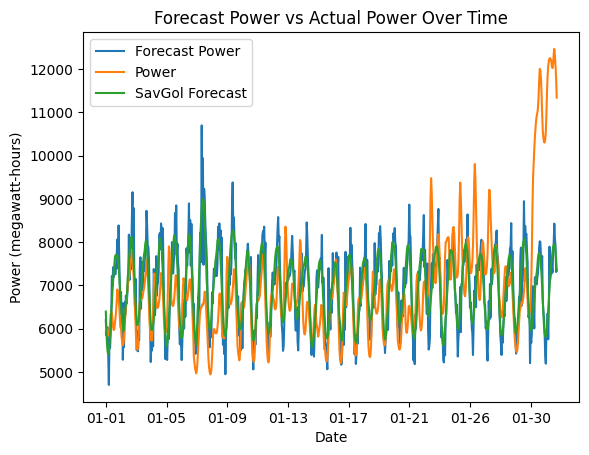

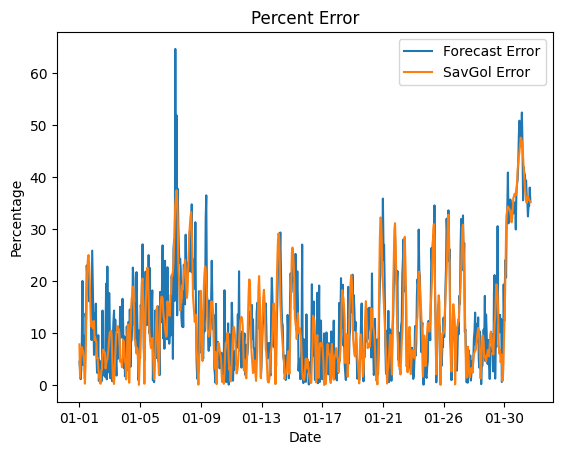

Mean Average Percent Error - base forecast:  12.57534340444222
Mean Average Percent Error - savgol forecast:  11.912068144307796
Forecast Generation Time: 184.25451350212097 seconds
-------------------------------
    location  year   date   time  temp  precip  humidity     power  \
0      SCENT  2023  01-01  00:00    50     0.0        80   5932.53   
1      SCENT  2023  01-01  01:00    47     0.0        86   6012.40   
2      SCENT  2023  01-01  02:00    45     0.0        90   5934.08   
3      SCENT  2023  01-01  03:00    46     0.0        89   5855.79   
4      SCENT  2023  01-01  04:00    42     0.0        92   5840.91   
..       ...   ...    ...    ...   ...     ...       ...       ...   
739    SCENT  2023  01-31  19:00    31     0.0        92  12468.61   
740    SCENT  2023  01-31  20:00    31     0.0        89  12306.65   
741    SCENT  2023  01-31  21:00    31     0.0        89  12083.38   
742    SCENT  2023  01-31  22:00    30     0.0        88  11777.17   
743    SCENT  20

Would you like to run again? (y/n) y
Howdy! Data is available for January 2023. Please enter the number of the day to begin forecasting from (1-31):  20
How many days would you like to forecast?  2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

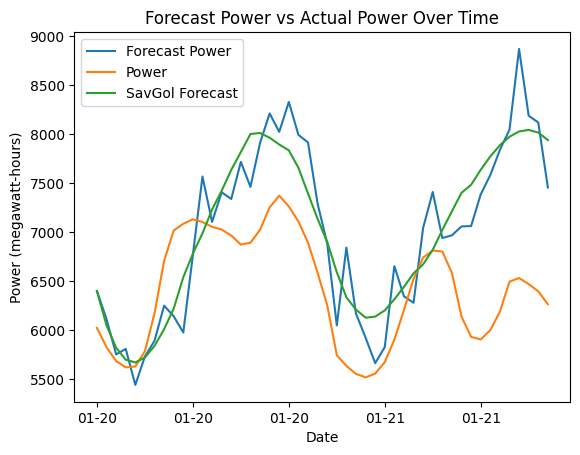

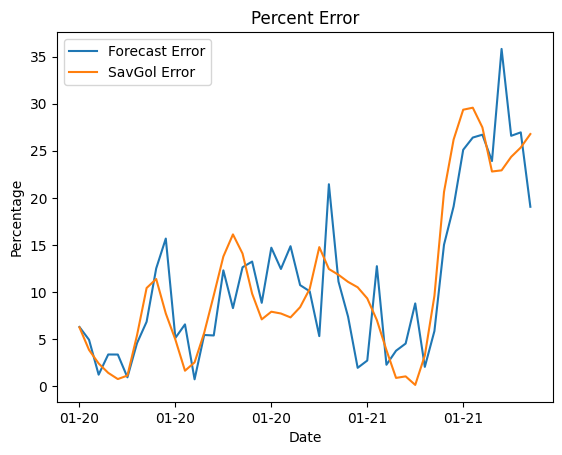

Mean Average Percent Error - base forecast:  11.145564457752215
Mean Average Percent Error - savgol forecast:  11.002975128777047
Forecast Generation Time: 19.235776901245117 seconds
-------------------------------
    location  year   date   time  temp  precip  humidity    power  \
456    SCENT  2023  01-20  00:00    46     0.0        63  6019.40   
457    SCENT  2023  01-20  01:00    47     0.0        71  5822.70   
458    SCENT  2023  01-20  02:00    47     0.0        68  5681.26   
459    SCENT  2023  01-20  03:00    52     0.0        50  5617.15   
460    SCENT  2023  01-20  04:00    51     0.0        61  5625.54   
461    SCENT  2023  01-20  05:00    52     0.0        53  5782.00   
462    SCENT  2023  01-20  06:00    52     0.0        53  6168.03   
463    SCENT  2023  01-20  07:00    52     0.0        50  6704.69   
464    SCENT  2023  01-20  08:00    52     0.0        53  7014.70   
465    SCENT  2023  01-20  09:00    53     0.0        48  7082.65   
466    SCENT  2023  01-20 

Would you like to run again? (y/n) y
Howdy! Data is available for January 2023. Please enter the number of the day to begin forecasting from (1-31):  25
How many days would you like to forecast?  2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

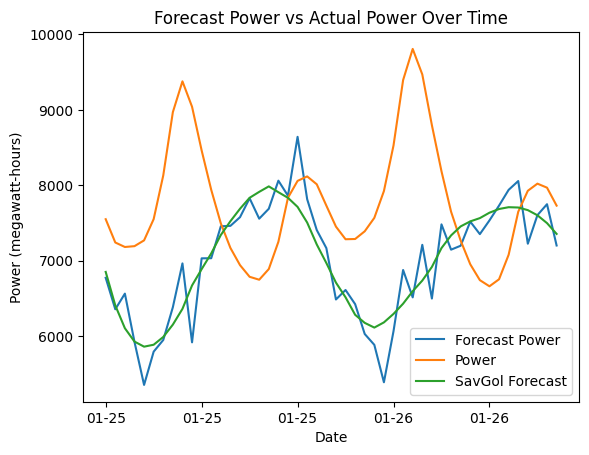

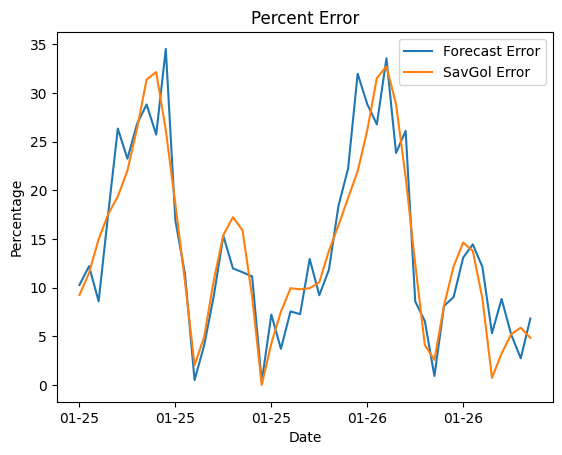

Mean Average Percent Error - base forecast:  14.169118574104038
Mean Average Percent Error - savgol forecast:  14.08602615115011
Forecast Generation Time: 19.243829011917114 seconds
-------------------------------
    location  year   date   time  temp  precip  humidity    power  \
576    SCENT  2023  01-25  00:00    43     0.0        71  7550.88   
577    SCENT  2023  01-25  01:00    42     0.0        73  7242.18   
578    SCENT  2023  01-25  02:00    42     0.0        73  7182.69   
579    SCENT  2023  01-25  03:00    42     0.0        73  7193.67   
580    SCENT  2023  01-25  04:00    42     0.0        73  7270.38   
581    SCENT  2023  01-25  05:00    40     0.0        79  7552.09   
582    SCENT  2023  01-25  06:00    39     0.0        79  8130.89   
583    SCENT  2023  01-25  07:00    41     0.0        76  8969.11   
584    SCENT  2023  01-25  08:00    42     0.0        70  9377.22   
585    SCENT  2023  01-25  09:00    44     0.0        68  9040.60   
586    SCENT  2023  01-25  

Would you like to run again? (y/n) n


In [6]:
# import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import pymilvus
import time as time
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pathlib import Path
from pymilvus import (
    connections,
    utility,
    FieldSchema, CollectionSchema, DataType,
    Collection,
)

from sqlalchemy import create_engine, MetaData
from sqlalchemy.engine import URL
import pypyodbc

# connect to milvus vdb
connections.connect(
  alias="default",
  user='root',
  password='tecafs',
  host='localhost',
  port='19530'
)

# set up embedding model
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

#initialize df for access outside of while loop
filtered_df = pd.DataFrame()

#while loop allows user to run multiple times
run_again = 'y'
while(run_again == 'y' or run_again == 'yes' or run_again == 'Y' or run_again == 'Yes'):

  # Read in the CSV file
  data_folder = Path("/mnt/c/Users/wcans/milvus_compose/ERCOT_Hourly_Load_2022/")
  csv_file_path = data_folder / "jan23demodata.csv"  # Path to raw 2023 data (pre forecasting)
  forecast_df = pd.read_csv(csv_file_path) #create dataframe

  '''###################################

  # declares the variables and defines them for the server connections, along with the table names that are going to be assigned
  SERVER_NAME = 'tcp:tecafs.database.windows.net,1433'
  DATABASE_NAME = 'TecafsSqlDatabase'
  TABLE_NAME = 'test_weather_forecast'

  ###################################

  # makes the connection to the database with the connection string; has the driver, server name, database name, id, and password
  connection_string = f"""
      DRIVER={{ODBC Driver 18 for SQL Server}};
      SERVER={SERVER_NAME};
      DATABASE={DATABASE_NAME};
      Uid={'tecafs2023'};
      Pwd={'Capstone50'};
  """
  ###################################

  connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})
  engine = create_engine(connection_url, module=pypyodbc)  

  ###################################

  #Query the data from the clean_data table
  query = "SELECT * FROM test_weather_forecast" 

  #Execute the query and load data into a Dataframe
  forecast_df = pd.read_sql(query, engine) #create dataframe'''


  start_day = int(input('Howdy! Data is available for January 2023. Please enter the number of the day to begin forecasting from (1-31): '))
  num_days = int(input('How many days would you like to forecast? '))
  
  if((32-start_day) < num_days):
      num_days = 32-start_day
  
  #find indices to start and end at
  end_day = start_day+num_days-1
  start_hour = 24*(start_day-1)
  end_hour = (24*end_day)-1

  #filter and set as new dataframe
  filtered_df = pd.DataFrame(forecast_df.iloc[start_hour:(end_hour+1)])

  #define embedding function
  def get_embedding(prevec):
      text = [prevec]
      embedding = model.encode(text)
      return embedding

  #format the prevector data conglomeration as year/date/time/temp/precip/humidity, then get embeddings
  filtered_df['vector'] = filtered_df.apply(lambda row: get_embedding(f"{row['year']}/{row['date']}/{row['time']}/{row['time']}/{row['time']}/{row['temp']}/{row['precip']}/{row['humidity']}"), axis=1)
  filtered_df['vector'] = filtered_df['vector'].apply(lambda row: row[0])  #fix formatting of vector

  collection = Collection("small_historical_data_3")  #get existing milvus collection
  collection.load()  #load collection






    
  def search(text, time, date, top_k = 10):
      # AUTOINDEX does not require any search params, chosen to specify metric
      search_params = {
          "metric_type": "L2"
      }

      #do similarity search
      results = collection.search(
          data = [text],
          anns_field='vector',
          param=search_params,
          limit = top_k,  # Limit to top_k results per search
          ##output_fields=['original_question', 'answer']  # Include the original question and answer in the result
          output_fields=['index', 'year', 'date', 'time', 'temp', 'precip', 'humidity', 'power']
      )
      avg_power = 0
      
      #sum the top_k power values
      for hit in  results[0]:
          #print (hit.entity.get(['year', 'date', 'time', 'temp', 'precip', 'humidity', 'power']))
          avg_power += hit.entity.get('power')

      #calculate average power, adjust to tune for best results
      month = int(date.split('-')[0])
      hour = int(time.split(':')[0])
      #yearly_avg = (-1200*math.sin((math.pi/6)*(month-1)+1))+(600*math.sin((math.pi/3)*(month-1)+1))+8200
      yearly_amp = (-1000*math.sin((math.pi/6)*(month-1)+1))+(300*math.sin((math.pi/3)*(month-1)+1))+1700
      #daily_power = (-(yearly_amp)*math.sin((math.pi/12)*hour))+yearly_avg
      #avg_power= (-3000*math.sin((math.pi/12)*hour))+(avg_power/top_k)
      avg_power= (-(yearly_amp)*math.sin((math.pi/12)*hour))+(avg_power/top_k)
      return avg_power

  start_time = time.time()
  filtered_df['forecast_power'] = filtered_df.apply(lambda row: search(row['vector'], row['time'], row['date']), axis=1)  
  end_time = time.time()

  elapsed_time = end_time - start_time

  #Calculate percent error for each row
  filtered_df['percent_error'] = ((abs(filtered_df['forecast_power'] - filtered_df['power'])) / filtered_df['power']) * 100
  
  #Calculate overall percent error
  mean_percent_error = filtered_df['percent_error'].mean()


    

  #apply savitsky-golay filter for smoothing
  filtered_df['forecast_savgol'] = filtered_df[['forecast_power']].apply(lambda x: savgol_filter(x,18,3))

  #Calculate savgol percent error for each row
  filtered_df['savgol_percent_error'] = ((abs(filtered_df['forecast_savgol'] - filtered_df['power'])) / filtered_df['power']) * 100
  
  #Calculate overall savgol percent error
  savgol_mean_percent_error = filtered_df['savgol_percent_error'].mean()


    

  '''
  def combine_seasonal_cols(input_df, seasonal_model_results):
    #Adds inplace new seasonal cols to df given seasonal results
    #Args:
    #    input_df (pandas dataframe)
    #    seasonal_model_results (statsmodels DecomposeResult object)
    
    # Add results to original df
    input_df['observed'] = seasonal_model_results.observed
    input_df['residual'] = seasonal_model_results.resid
    input_df['seasonal'] = seasonal_model_results.seasonal
    input_df['trend'] = seasonal_model_results.trend
   
  #Check seasonality of data to validate
  seasonality_df = filtered_df[['year', 'date', 'time', 'power']]
  seasonality_df['year'] = seasonality_df['year'].astype(str)
  seasonality_df['time'] = pd.to_datetime(seasonality_df['date'] + '-' + seasonality_df['year'] + seasonality_df['time'], format='%m-%d-%Y%H:%M')
  seasonality_df_2 = seasonality_df[['time', 'power']]
  seasonality_df_2.set_index('time', inplace=True)
  sd = sm.tsa.seasonal_decompose(seasonality_df_2, period=12)
  sd.plot()
  combine_seasonal_cols(seasonality_df_2, sd)
  
  pred_seas_df = filtered_df[['year', 'date', 'time', 'forecast_power']]
  pred_seas_df['year'] = pred_seas_df['year'].astype(str)
  pred_seas_df['time'] = pd.to_datetime(pred_seas_df['date'] + '-' + pred_seas_df['year'] + pred_seas_df['time'], format='%m-%d-%Y%H:%M')
  pred_seas_df_2 = pred_seas_df[['time', 'forecast_power']]
  pred_seas_df_2.set_index('time', inplace=True)
  pred_sd = sm.tsa.seasonal_decompose(pred_seas_df_2, period=12)
  pred_sd.plot()
  combine_seasonal_cols(pred_seas_df_2, pred_sd)

  #create and print trend plot
  seasonality_df_2.reset_index(drop=True)
  pred_seas_df_2.reset_index(drop=True)
  seasonality_df_2.plot(x="time", y='trend', kind="line")
  pred_seas_df_2.plot(x="time", y='trend', kind="line")
  # Display the plot
  plt.title('Forecast Power Trend vs Actual Power Trend Over Time')
  plt.xlabel('Date')
  plt.ylabel('Power (megawatt-hours)')
  plt.legend(['Power Trend', 'Forecast Power Trend'])
  plt.savefig('trend_figure.png')
  plt.show(block=True)'''
  

  # Write the modified DataFrame back to a new CSV file
  output_csv_file_path = data_folder / '5daydemoforecast1_out.csv'  # Replace with the desired output path
  #not enabled at the moment
  #filtered_df.to_csv(output_csv_file_path, index=False)

  #print data
  #create and print plots
  filtered_df.plot(x="date", y=["forecast_power", "power", "forecast_savgol"], kind="line")
  # Display the plot
  plt.title('Forecast Power vs Actual Power Over Time')
  plt.xlabel('Date')
  plt.ylabel('Power (megawatt-hours)')
  plt.legend(['Forecast Power', 'Power', 'SavGol Forecast'])
  plt.savefig('power_figure.png')
  plt.show(block=True)


  filtered_df.plot(x='date', y=['percent_error', 'savgol_percent_error'], kind='line')
  # Display the plot
  plt.title('Percent Error')
  plt.xlabel('Date')
  plt.ylabel('Percentage')
  plt.legend(['Forecast Error', 'SavGol Error'])
  plt.savefig('error_figure.png')
  plt.show(block=True)

  print('Mean Average Percent Error - base forecast: ', mean_percent_error)
  print('Mean Average Percent Error - savgol forecast: ', savgol_mean_percent_error)
  print(f"Forecast Generation Time: {elapsed_time} seconds")
  print('-------------------------------')

  filtered_df = filtered_df.drop(columns=['vector'])
  print(filtered_df)

  #Format forecast for insertion
  filtered_df = filtered_df.drop(columns=['power', 'percent_error'])

  #Add to SQL
  #filtered_df.to_sql('VDB_forecast', con=engine, if_exists='append', index=False)
  
  # User Interface
  run_again = input('Would you like to run again? (y/n)')
  


In [13]:
from sqlalchemy import create_engine, MetaData
from sqlalchemy.engine import URL
import pypyodbc
import pandas as pd

###################################

# declares the variables and defines them for the server connections, along with the table names that are going to be assigned
SERVER_NAME = 'tcp:tecafs.database.windows.net,1433'
DATABASE_NAME = 'TecafsSqlDatabase'
TABLE_NAME = 'clean_data'

###################################

# makes the connection to the database with the connection string; has the driver, server name, database name, id, and password
connection_string = f"""
    DRIVER={{ODBC Driver 18 for SQL Server}};
    SERVER={SERVER_NAME};
    DATABASE={DATABASE_NAME};
    Uid={'tecafs2023'};
    Pwd={'Capstone50'};
"""

#Connect to SQL
connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})
engine = create_engine(connection_url, module=pypyodbc)

#Format forecast for insertion
filtered_df = filtered_df.drop(columns=['power', 'percent_error'])

#Add to SQL
filtered_df.to_sql('VDB_forecast', con=engine, if_exists='append', index=False)

    location  year   date   time  temp  precip  humidity    power  \
96     SCENT  2023  01-05  00:00    38     0.0        86  6122.55   
97     SCENT  2023  01-05  01:00    45     0.0        68  5979.06   
98     SCENT  2023  01-05  02:00    38     0.0        89  5916.94   
99     SCENT  2023  01-05  03:00    35     0.0        89  5917.18   
100    SCENT  2023  01-05  04:00    40     0.0        83  5988.84   
..       ...   ...    ...    ...   ...     ...       ...      ...   
211    SCENT  2023  01-09  19:00    58     0.0        75  7375.04   
212    SCENT  2023  01-09  20:00    56     0.0        84  7299.31   
213    SCENT  2023  01-09  21:00    56     0.0        90  7155.31   
214    SCENT  2023  01-09  22:00    56     0.0        90  6866.14   
215    SCENT  2023  01-09  23:00    57     0.0        93  6453.35   

     forecast_power  percent_error  
96         6492.722       6.046043  
97         6323.403       5.759149  
98         5852.439       1.090107  
99         6368.022    

120

/tmp/ipykernel_102/2832727676.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['observed'] = seasonal_model_results.observed
/tmp/ipykernel_102/2832727676.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['residual'] = seasonal_model_results.resid
/tmp/ipykernel_102/2832727676.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

'\n  pred_seas_df = filtered_df[[\'year\', \'date\', \'time\', \'forecast_power\']]\n  pred_seas_df[\'year\'] = pred_seas_df[\'year\'].astype(str)\n  pred_seas_df[\'time\'] = pd.to_datetime(pred_seas_df[\'date\'] + \'-\' + pred_seas_df[\'year\'] + pred_seas_df[\'time\'], format=\'%m-%d-%Y%H:%M\')\n  pred_seas_df_2 = pred_seas_df[[\'time\', \'forecast_power\']]\n  pred_seas_df_2.set_index(\'time\', inplace=True)\n  pred_sd = sm.tsa.seasonal_decompose(pred_seas_df_2, period=12)\n  pred_sd.plot()\n  combine_seasonal_cols(pred_seas_df_2, pred_sd)\n\n  #create and print trend plot\n  seasonality_df_2.reset_index(drop=True)\n  pred_seas_df_2.reset_index(drop=True)\n  seasonality_df_2.plot(x="time", y=\'trend\', kind="line")\n  pred_seas_df_2.plot(x="time", y=\'trend\', kind="line")\n  # Display the plot\n  plt.title(\'Forecast Power Trend vs Actual Power Trend Over Time\')\n  plt.xlabel(\'Date\')\n  plt.ylabel(\'Power (megawatt-hours)\')\n  plt.legend([\'Power Trend\', \'Forecast Power Trend

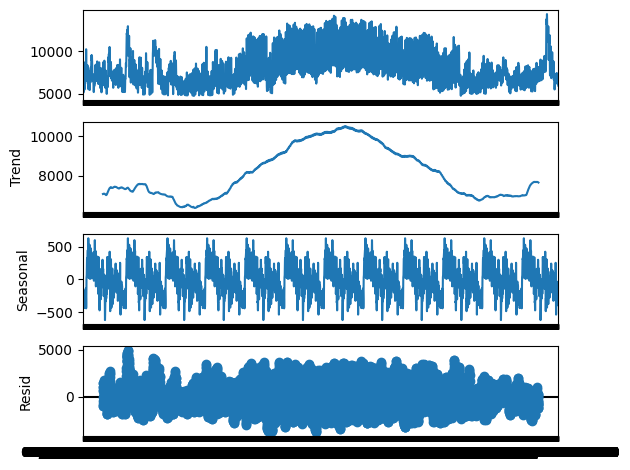

In [18]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import pymilvus
import time as time
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pathlib import Path

  # Read in the CSV file
data_folder = Path("/mnt/c/Users/wcans/milvus_compose/ERCOT_Hourly_Load_2022/")
csv_file_path = data_folder / "ERCOT_2022.csv"  # Path to raw 2022 data
ercot_df = pd.read_csv(csv_file_path) #create dataframe

def combine_seasonal_cols(input_df, seasonal_model_results):
    #Adds inplace new seasonal cols to df given seasonal results
    #Args:
    #    input_df (pandas dataframe)
    #    seasonal_model_results (statsmodels DecomposeResult object)
    
    # Add results to original df
    input_df['observed'] = seasonal_model_results.observed
    input_df['residual'] = seasonal_model_results.resid
    input_df['seasonal'] = seasonal_model_results.seasonal
    input_df['trend'] = seasonal_model_results.trend
   
#Check seasonality of data to validate
seasonality_df = ercot_df[['Hour Ending', 'SCENT']]
#seasonality_df['year'] = seasonality_df['year'].astype(str)
#seasonality_df['time'] = pd.to_datetime(seasonality_df['date'] + '-' + seasonality_df['year'] + seasonality_df['time'], format='%m-%d-%Y%H:%M')
#seasonality_df_2 = seasonality_df[['time', 'power']]
seasonality_df.set_index('Hour Ending', inplace=True)
sd = sm.tsa.seasonal_decompose(seasonality_df, period=730)
sd.plot()
combine_seasonal_cols(seasonality_df, sd)
'''
  pred_seas_df = filtered_df[['year', 'date', 'time', 'forecast_power']]
  pred_seas_df['year'] = pred_seas_df['year'].astype(str)
  pred_seas_df['time'] = pd.to_datetime(pred_seas_df['date'] + '-' + pred_seas_df['year'] + pred_seas_df['time'], format='%m-%d-%Y%H:%M')
  pred_seas_df_2 = pred_seas_df[['time', 'forecast_power']]
  pred_seas_df_2.set_index('time', inplace=True)
  pred_sd = sm.tsa.seasonal_decompose(pred_seas_df_2, period=12)
  pred_sd.plot()
  combine_seasonal_cols(pred_seas_df_2, pred_sd)

  #create and print trend plot
  seasonality_df_2.reset_index(drop=True)
  pred_seas_df_2.reset_index(drop=True)
  seasonality_df_2.plot(x="time", y='trend', kind="line")
  pred_seas_df_2.plot(x="time", y='trend', kind="line")
  # Display the plot
  plt.title('Forecast Power Trend vs Actual Power Trend Over Time')
  plt.xlabel('Date')
  plt.ylabel('Power (megawatt-hours)')
  plt.legend(['Power Trend', 'Forecast Power Trend'])
  plt.savefig('trend_figure.png')
  plt.show(block=True)'''

In [5]:
from pymilvus import (
    connections,
    utility,
    FieldSchema, CollectionSchema, DataType,
    Collection,
)
# connect to milvus vdb
connections.connect(
  alias="default",
  user='root',
  password='tecafs',
  host='localhost',
  port='19530',
  secure=,
  server_pem_path="/mnt/c/Users/wcans/cert/server.pem",
  server_name="mfstec"
)

print(f"\nList connections:")
print(connections.list_connections())

E0415 11:56:21.609466600    1362 ssl_transport_security.cc:1420]       Handshake failed with fatal error SSL_ERROR_SSL: error:100000f7:SSL routines:OPENSSL_internal:WRONG_VERSION_NUMBER.
E0415 11:56:21.611355600    1362 ssl_transport_security.cc:1420]       Handshake failed with fatal error SSL_ERROR_SSL: error:100000f7:SSL routines:OPENSSL_internal:WRONG_VERSION_NUMBER.
E0415 11:56:22.610427600    1362 ssl_transport_security.cc:1420]       Handshake failed with fatal error SSL_ERROR_SSL: error:100000f7:SSL routines:OPENSSL_internal:WRONG_VERSION_NUMBER.
E0415 11:56:22.612942400    1362 ssl_transport_security.cc:1420]       Handshake failed with fatal error SSL_ERROR_SSL: error:100000f7:SSL routines:OPENSSL_internal:WRONG_VERSION_NUMBER.
E0415 11:56:24.021571200    1362 ssl_transport_security.cc:1420]       Handshake failed with fatal error SSL_ERROR_SSL: error:100000f7:SSL routines:OPENSSL_internal:WRONG_VERSION_NUMBER.
E0415 11:56:24.022987200    1362 ssl_transport_security.cc:1420] 

MilvusException: <MilvusException: (code=2, message=Fail connecting to server on localhost:19530. Timeout)>

E0415 11:56:35.334153700    1362 ssl_transport_security.cc:1420]       Handshake failed with fatal error SSL_ERROR_SSL: error:100000f7:SSL routines:OPENSSL_internal:WRONG_VERSION_NUMBER.
E0415 11:56:36.553352600    1362 ssl_transport_security.cc:1420]       Handshake failed with fatal error SSL_ERROR_SSL: error:100000f7:SSL routines:OPENSSL_internal:WRONG_VERSION_NUMBER.
E0415 11:56:47.351894000    1481 ssl_transport_security.cc:1420]       Handshake failed with fatal error SSL_ERROR_SSL: error:100000f7:SSL routines:OPENSSL_internal:WRONG_VERSION_NUMBER.
E0415 11:56:47.440680700    1481 ssl_transport_security.cc:1420]       Handshake failed with fatal error SSL_ERROR_SSL: error:100000f7:SSL routines:OPENSSL_internal:WRONG_VERSION_NUMBER.
E0415 11:57:03.206193700    1362 ssl_transport_security.cc:1420]       Handshake failed with fatal error SSL_ERROR_SSL: error:100000f7:SSL routines:OPENSSL_internal:WRONG_VERSION_NUMBER.
E0415 11:57:04.802381300    1362 ssl_transport_security.cc:1420] 